In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import KNNImputer
import json
import pickle


#### 1. Problem Statement

#### 2. Data Gathering

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


###### 3. EDA

In [3]:
columns_list=df.columns

In [4]:
import re

In [5]:
col_list=[]
for col_name in columns_list:
    col_name=re.sub('[-/]','_',col_name.strip())
    col_name=re.sub(' ','_',col_name)
    col_list.append(col_name)
print(col_list)

['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness__1_19_years', 'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling']


In [6]:
df.columns=col_list

In [7]:
df

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [13]:
def missing_outlier_detection(array):
    q1=np.quantile(array,0.25)
    q3=np.quantile(array,0.75)
    iqr=q3-q1
    upper_tail=q3+1.5*iqr
    lower_tail=q1-1.5*iqr
    print('Upper_tail :',upper_tail)
    print('Lower_Tail :',lower_tail)
    index=np.where((array>upper_tail)|(array<lower_tail))
    print('Outlier Index:',index)
    print('No of Missing Values are ',array.isna().sum())
    

#### Status

In [21]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [22]:
df['Status'].replace({'Developing':1,'Developed':2},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2928 non-null   float64
 3   Adult_Mortality                  2928 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total_expenditure   

#### KNN Imputer

In [26]:
df.isna().sum()

Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness__1_19_years                34
thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [27]:
knn_imputer=KNNImputer(n_neighbors=5)

In [28]:
array=knn_imputer.fit_transform(df)
df=pd.DataFrame(array,columns=df.columns)
df

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,2015.0,1.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014.0,1.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013.0,1.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012.0,1.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011.0,1.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,1.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003.0,1.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002.0,1.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001.0,1.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   float64
 1   Status                           2938 non-null   float64
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   float64
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

##### 4. Feature Selection

##### 5. Model Training

In [30]:
x=df.drop('Life_expectancy',axis=1)
y=df['Life_expectancy']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [32]:
dt_reg=DecisionTreeRegressor()

In [33]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
y_pred_test=dt_reg.predict(x_test)
y_pred_test.shape

(588,)

In [36]:
y_pred_train=dt_reg.predict(x_train)


##### 6. Model Evaluation

###### Tetsing Data Evaluation

In [40]:
residual_test=y_test-y_pred_test
#print('residual_test:', residual_test)
mse_test=mean_squared_error(y_test,y_pred_test)
print('MSE_test:', mse_test)
rmse_test=np.sqrt(mse_test)
print('RMSE_test:', rmse_test)
mae_test=mean_absolute_error(y_test,y_pred_test)
print('MAE_test:', mae_test)
r2_test=r2_score(y_test,y_pred_test)
print('R2_test:', r2_test)


MSE_test: 6.644203401360543
RMSE_test: 2.577635234349605
MAE_test: 1.4907142857142852
R2_test: 0.9258039652920058


###### Training Data Evaluation

In [39]:
residual_train=y_train-y_pred_train
#print('residual_test:', residual_test)
mse_train=mean_squared_error(y_train,y_pred_train)
print('MSE_train:', mse_train)
rmse_train=np.sqrt(mse_train)
print('RMSE_train:', rmse_train)
mae_train=mean_absolute_error(y_train,y_pred_train)
print('MAE_train:', mae_train)
r2_train=r2_score(y_train,y_pred_train)
print('R2_train:', r2_train)


MSE_train: 0.0
RMSE_train: 0.0
MAE_train: 0.0
R2_train: 1.0


##### Hyper Parameter Tuning

In [43]:
dt_reg_h=DecisionTreeRegressor(random_state=10)
param_grid={'criterion':['squared_error','absolute_error'],
           'max_depth': np.arange(3,30),
           'min_samples_split':np.arange(3,20),
           'min_samples_leaf':np.arange(3,10)}
rscv=RandomizedSearchCV(dt_reg_h,param_grid,cv=5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=6,
                      random_state=10)

In [44]:
dt_reg_h=rscv.best_estimator_

In [45]:
dt_reg_h.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=6,
                      random_state=10)

In [46]:
y_pred_test_h=dt_reg_h.predict(x_test)
y_pred_train_h=dt_reg_h.predict(x_train)

In [47]:
mse_test_h=mean_squared_error(y_test,y_pred_test_h)
print('MSE_test:', mse_test_h)
rmse_test_h=np.sqrt(mse_test_h)
print('RMSE_test:', rmse_test_h)
mae_test_h=mean_absolute_error(y_test,y_pred_test_h)
print('MAE_test:', mae_test_h)
r2_test_h=r2_score(y_test,y_pred_test_h)
print('R2_test:', r2_test_h)

MSE_test: 7.360647977928885
RMSE_test: 2.713051414538413
MAE_test: 1.8213786645208674
R2_test: 0.9178034054869683


In [48]:
mse_train_h=mean_squared_error(y_train,y_pred_train_h)
print('MSE_train:', mse_train_h)
rmse_train_h=np.sqrt(mse_train_h)
print('RMSE_train:', rmse_train_h)
mae_train_h=mean_absolute_error(y_train,y_pred_train_h)
print('MAE_train:', mae_train_h)
r2_train_h=r2_score(y_train,y_pred_train_h)
print('R2_train:', r2_train_h)

MSE_train: 3.3226894598302934
RMSE_train: 1.8228245828467131
MAE_train: 1.2807015565751072
R2_train: 0.9633590568710533


#### Pruning

In [49]:
dt_reg_pruning=DecisionTreeRegressor()

In [51]:
ccp_alpha=dt_reg_pruning.cost_complexity_pruning_path(x_train,y_train)['ccp_alphas']
ccp_alpha

array([0.00000000e+00, 2.90264267e-16, 3.87019022e-16, ...,
       5.27615358e+00, 1.07454474e+01, 5.16490382e+01])

In [52]:
test_accuracies=[]
train_accuracies=[]
for i in ccp_alpha:
    dt_reg_pruning=DecisionTreeRegressor(ccp_alpha=i)
    dt_reg_pruning.fit(x_train,y_train)
    test_accuracies.append(r2_score(y_test,dt_reg_pruning.predict(x_test)))
    train_accuracies.append(r2_score(y_train,dt_reg_pruning.predict(x_train)))
    
    

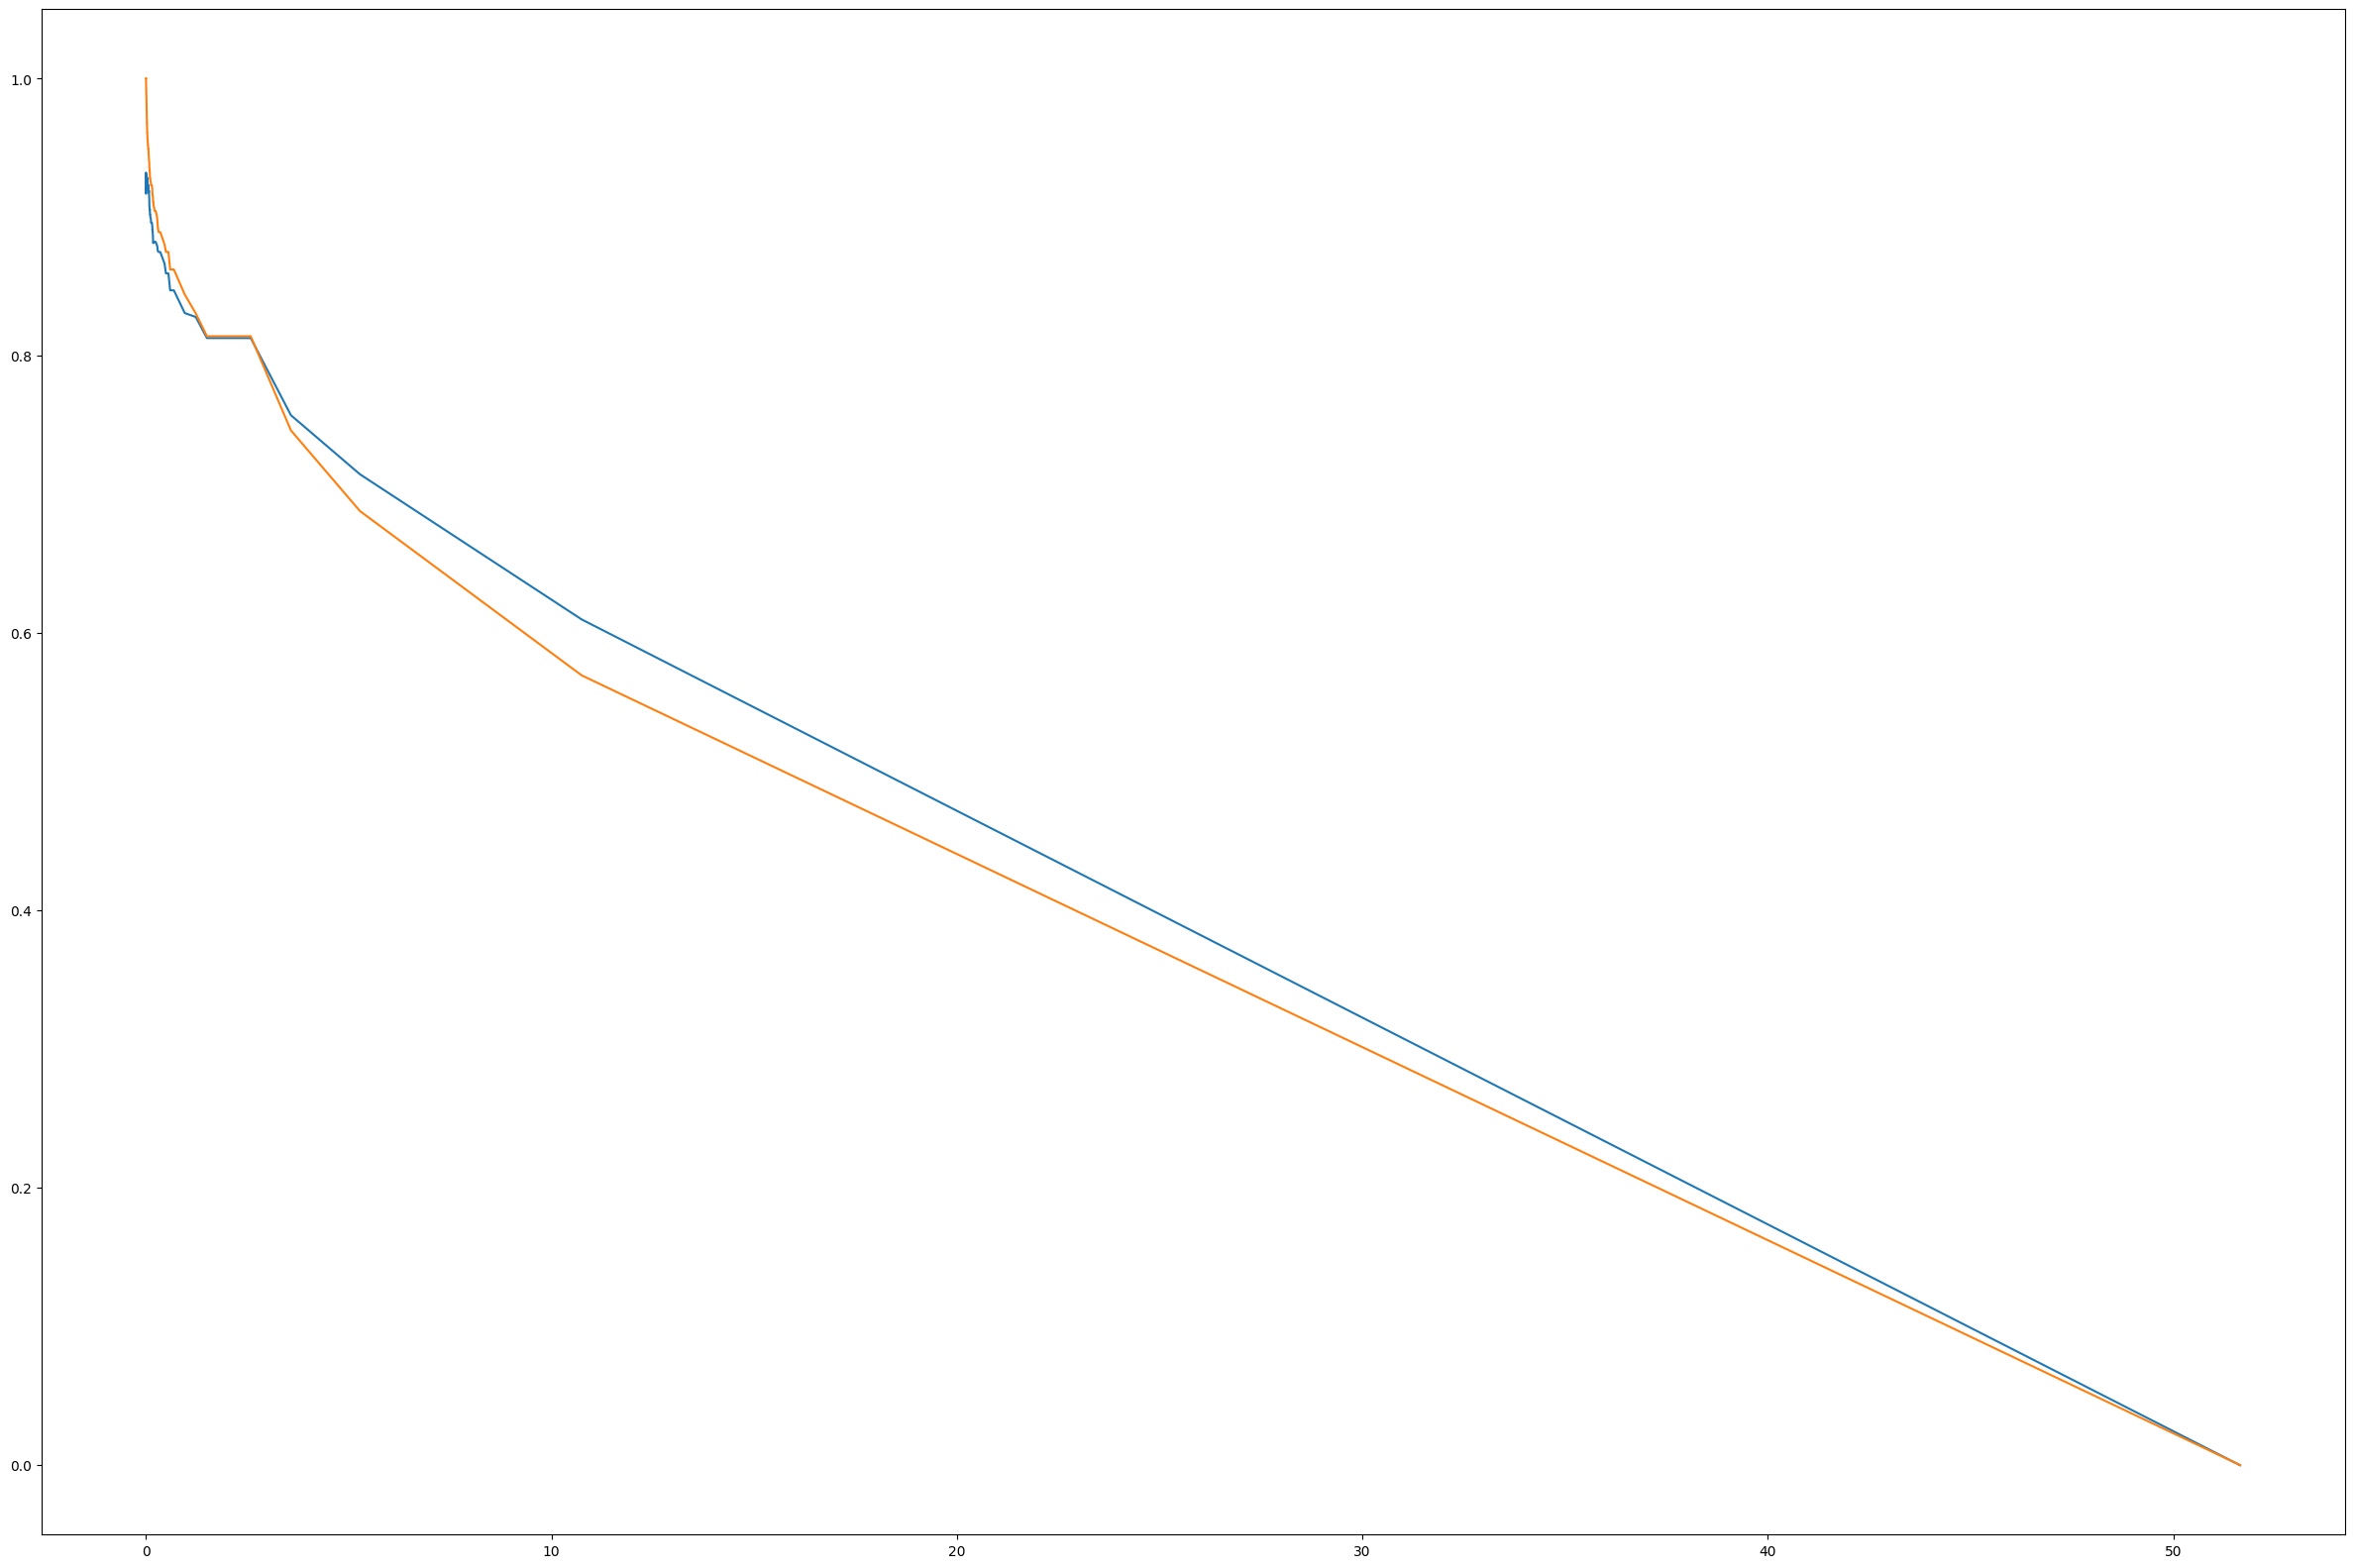

In [54]:
plt.figure(figsize=(30,20))
plt.plot(ccp_alpha,test_accuracies)
plt.plot(ccp_alpha,train_accuracies)

In [59]:
import plotly.express as px
plt.figure(figsize=(30,20))
px.line(x=ccp_alpha,y=test_accuracies)

<Figure size 3000x2000 with 0 Axes>

In [58]:
px.line(x=ccp_alpha,y=train_accuracies)

In [78]:
np.where(ccp_alpha<=0.184)

(array([   0,    1,    2, ..., 2039, 2040, 2041], dtype=int64),)

In [146]:
ccp_alpha[2015]

0.06481310439212704

In [145]:
test_accuracies[2015]

0.918595626787803

In [144]:
train_accuracies[2015]

0.9451258053362049

In [147]:
dt_reg_pruning=DecisionTreeRegressor(ccp_alpha=ccp_alpha[2015])

In [148]:
dt_reg_pruning.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.06481310439212704)

In [149]:
y_pred_test_pruning=dt_reg_pruning.predict(x_test)
y_pred_train_pruning=dt_reg_pruning.predict(x_train)

In [150]:
mse_test_pruning=mean_squared_error(y_test,y_pred_test_pruning)
print('MSE_test:', mse_test_h)
rmse_test_pruning=np.sqrt(mse_test_pruning)
print('RMSE_test:', rmse_test_pruning)
mae_test_pruning=mean_absolute_error(y_test,y_pred_test_pruning)
print('MAE_test:', mae_test_pruning)
r2_test_pruning=r2_score(y_test,y_pred_test_pruning)
print('R2_test:', r2_test_pruning)

MSE_test: 7.360647977928885
RMSE_test: 2.699945390262105
MAE_test: 1.8993367042937896
R2_test: 0.918595626787803


In [162]:
mse_train_pruning=mean_squared_error(y_train,y_pred_train_pruning)
print('MSE_train:', mse_train_pruning)
rmse_train_pruning=np.sqrt(mse_train_pruning)
print('RMSE_train:', rmse_train_pruning)
mae_train_pruning=mean_absolute_error(y_train,y_pred_train_pruning)
print('MAE_train:', mae_train_pruning)
r2_train_pruning=r2_score(y_train,y_pred_train_pruning)
print('R2_train:', r2_train_pruning)

MSE_train: 4.976124866229905
RMSE_train: 2.230722946990483
MAE_train: 1.6648430977871465
R2_train: 0.9451258053362049


In [158]:
accuracy_score={'DT':{'Train':r2_train,'Test':r2_test},
               'DT_HyperParameter':{'Train':r2_train_h,'Test':r2_test_h},
               'DT_Pruning':{'Train':r2_train_pruning,'Test':r2_test_pruning}}
df_accuracy=pd.DataFrame(accuracy_score)
np.around(df_accuracy,3)

,DT,DT_HyperParameter,DT_Pruning
Train,1.000,0.963,0.945
Test,0.926,0.918,0.919


In [163]:
dt_reg_pruning.feature_importances_

array([0.00277608, 0.        , 0.13707489, 0.00640481, 0.01310334,
       0.        , 0.        , 0.00573162, 0.00078025, 0.        ,
       0.        , 0.00242706, 0.00142455, 0.62140988, 0.00104981,
       0.        , 0.        , 0.00665588, 0.1887194 , 0.01244243])

<BarContainer object of 20 artists>

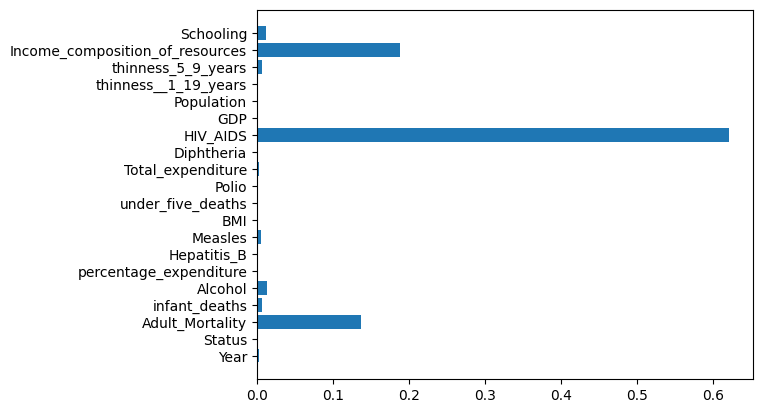

In [164]:
plt.barh(y=x.columns,width=dt_reg_pruning.feature_importances_)

In [159]:
json_data={'Status':{'Developing':1,'Developed':2}}

In [160]:
with open('json_data.json','w') as f:
    json.dump(json_data,f)

In [161]:
with open('Decision_Tree_Regression_Life_expectancy.pkl','wb') as f:
    pickle.dump(dt_reg_pruning,f)